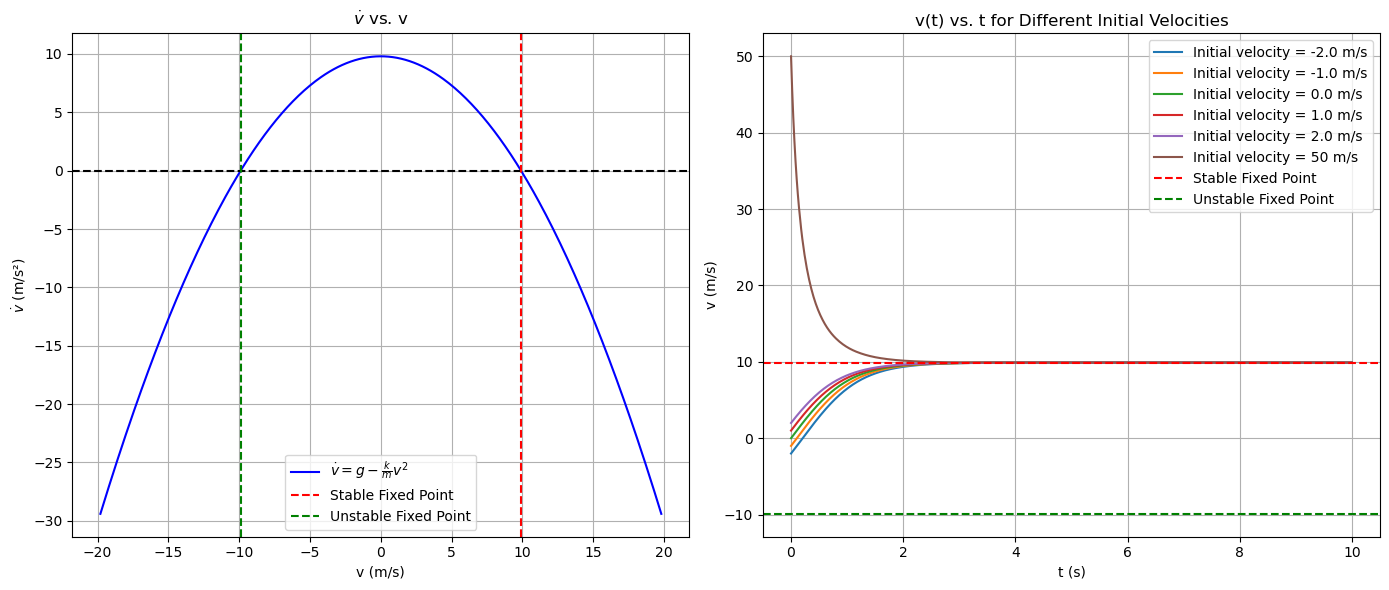

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
m = 1.0  # kg
k = 0.1  # kg/s
g = 9.8  # m/s^2

# Function to compute dv/dt
def dvdt(v):
    return g - (k / m) * v**2

# Function for solving the ODE
def velocity_ode(t, v):
    return g - (k / m) * v**2

# Time span for solving the ODE
t_span = (0, 10)  # seconds
initial_conditions = [-2.0, -1.0, 0.0, 1.0, 2.0, 50]  # different initial velocities

# Create plots
plt.figure(figsize=(14, 6))

# Plot of dv/dt vs. v
v_values = np.linspace(-2 * np.sqrt(m * g / k), 2 * np.sqrt(m * g / k), 400)
dvdt_values = dvdt(v_values)

plt.subplot(1, 2, 1)
plt.plot(v_values, dvdt_values, label=r'$\dot{v} = g - \frac{k}{m}v^2$', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(np.sqrt(m * g / k), color='red', linestyle='--', label='Stable Fixed Point')
plt.axvline(-np.sqrt(m * g / k), color='green', linestyle='--', label='Unstable Fixed Point')
plt.xlabel('v (m/s)')
plt.ylabel(r'$\dot{v}$ (m/s²)')
plt.title(r'$\dot{v}$ vs. v')
plt.legend()
plt.grid(True)

# Plot v(t) vs. t for different initial velocities
plt.subplot(1, 2, 2)
for v0 in initial_conditions:
    solution = solve_ivp(velocity_ode, t_span, [v0], t_eval=np.linspace(0, 10, 500))
    plt.plot(solution.t, solution.y[0], label=f'Initial velocity = {v0} m/s')

# Plot the stable fixed point
v_star = np.sqrt(m * g / k)
plt.axhline(v_star, color='red', linestyle='--', label='Stable Fixed Point')

# Plot the unstable fixed point
plt.axhline(-v_star, color='green', linestyle='--', label='Unstable Fixed Point')

plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('v(t) vs. t for Different Initial Velocities')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
